# DASL Challenge 3 by Chinedu Ogbozor

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv('foodhub_order.csv')
df.rating

0       Not given
1       Not given
2               5
3               3
4               4
          ...    
1893            5
1894            5
1895    Not given
1896            5
1897    Not given
Name: rating, Length: 1898, dtype: object

### Understanding the structure of the data

In [3]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Next, we perform a little cleaning as follows

* I will change all the "Not given" values in the rating column to null values (np.nan)
* I will check for duplicate values.

In [4]:
#Replace "Not given" in the rating column with nan from numpy
df['rating'].replace('Not given', np.nan, inplace=True)

In [5]:
df.rating.head()

0    NaN
1    NaN
2      5
3      3
4      4
Name: rating, dtype: object

### **Question 1:** How many rows and columns are present in the data?

In [8]:
# checking the shape of the dataframe
df.shape

(1898, 9)

In [9]:
f'The Dataset contains {df.shape[1]} columns and {df.shape[0]} rows'

'The Dataset contains 9 columns and 1898 rows'

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**NB:** Rating is currently an object (strings). Subsequently, we are going to convert it to integer so we can calculate the average rating for different restaurants.

#### Convert the rating column to numeric

In [334]:
# We can potentially use this code to covert nan to zero.
# However, this way zero will affect the average and will not be noticed as missing values.

#df['rating'] = df['rating'].fillna(0)


In [7]:
# Here I type cast the rating column to a float
df['rating'] = df.rating.astype('float')
df.rating.value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [8]:
# Using the isna() function to see the any missing values
df.isna().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

There are 736 missing entries in the rating column of the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [9]:
#Getting a statistical summary of the dataset
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


In [7]:
# Geting the min, mean and maximum food preparation time

print(f"Minimum food preparation time: {round(df['food_preparation_time'].min(),2)} minutes")
print(f"Average food preparation time: {round(df['food_preparation_time'].mean(),2)} minutes")
print(f"Maximum food preparation time: {round(df['food_preparation_time'].max(),2)} minutes")
print(f"Maximum food preparation time: {round(df['food_preparation_time'].max(),2)} minutes")

Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes


### **Question 5:** How many orders are not rated? 

In [10]:
# To estimate the occurance and the values in the rating column
df.rating.isna().sum()

736

In [11]:
# To print out the total occurance of not given in the rating column
print(f"Total number of orders not rated: {df['rating'].isna().sum()}")

Total number of orders not rated: 736


In [17]:
# Another way to approach this, we obtain the entries in the rating column that is not numeric.
# This will work even if the rating column is still of dtype object.
not_rated = pd.to_numeric(df['rating'], errors='coerce').isna().sum()
not_rated

736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

In [18]:
# getting the varible in the data
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [19]:
# Exploring the variable types
df.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                   float64
food_preparation_time      int64
delivery_time              int64
dtype: object

#### Order ID

In [20]:
# Change order Id to categorical variable
df['order_id'] = df['order_id'].astype('category')
df.order_id.value_counts()

1476547    1
1477807    1
1477819    1
1477818    1
1477817    1
          ..
1477176    1
1477175    1
1477174    1
1477173    1
1478444    1
Name: order_id, Length: 1898, dtype: int64

In [21]:
# Check for duplicated order_id row
df[df.order_id.duplicated()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


#### Observation:
The output show that there is no repeating order_id. To make sure order_id is unique, I took the the investigation further.

In [12]:
# I checked if the count of unique order_id was equal to the total order_id count.
len(df.order_id), len(df.order_id.unique()) 

(1898, 1898)

#### Oberservation:
Order_id is unique per order placed and can be used as a primary key in a relational database.

#### Customer ID

In [13]:
# Changing customer_id to a categoryical varible.
df['customer_id'] = df['customer_id'].astype('category')

In [14]:
df.customer_id.value_counts()

52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Name: customer_id, Length: 1200, dtype: int64

#### Observation:
Some customer_id recurred more than once. To further investigate I checked the rows with duplicate customer_id

In [59]:
# Checking for duplicate rows
df[df.customer_id.duplicated()].sort_values('customer_id').head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1199,1477113,6987,Hill Country Fried Chicken,Southern,12.23,Weekday,4,20,29
1178,1477489,14869,Tres Carnes,Mexican,9.17,Weekend,4,25,30
1040,1476949,14869,Pepe Rosso To Go,Italian,16.30,Weekend,0,23,30
1560,1477868,27609,Blue Ribbon Sushi Bar & Grill,Japanese,15.81,Weekend,0,21,25
1261,1477833,27609,Shake Shack,American,15.57,Weekday,0,28,30
...,...,...,...,...,...,...,...,...,...
1484,1477313,395616,Parm,Italian,8.59,Weekday,5,32,33
1778,1477062,396432,Blue Ribbon Sushi,Japanese,19.40,Weekend,5,26,17
1435,1477447,398952,Han Dynasty,Chinese,5.82,Weekend,0,26,24
640,1477799,399520,Xe May Sandwich Shop,Vietnamese,14.07,Weekday,0,28,28


In [61]:
# I checked if the count of unique customer_id was equal to the total customer_id count.
customer_count = len(df.customer_id), len(df.customer_id.unique())
print(customer_count)
f'{customer_count[0]-customer_count[1]} customers IDs were duplicated'

(1898, 1200)


'Duplicate customer ID is 698 customers'

In [12]:
#To better visulaze this, I check the counts of each customer ID in the dataset
df.customer_id.value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

#### Observation:
Customer ID 52832 used our app to order food about 13 being the highet repeating patronage to our app. 
Next, I plot a graph of the top 10 customers by patronage.

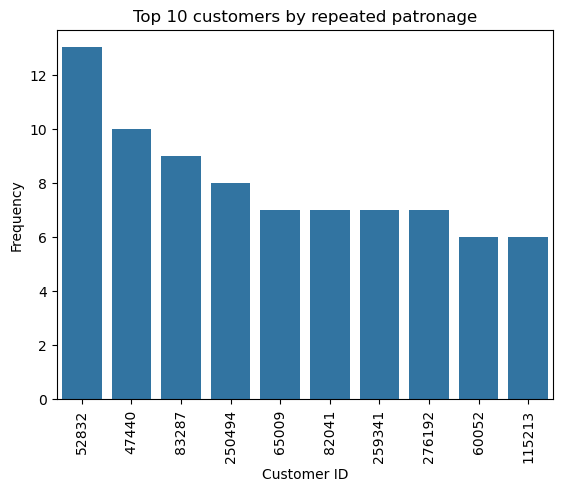

In [16]:
# Plotting the bar chart for the top 10 customers by order frequceny
#plt.rcParams["figure.figsize"] = (10, 5)
sns.countplot(data=df,x='customer_id', order=df.value_counts(df['customer_id']).iloc[:10].index,color='#1f77b4');

# Adding title and axis labels
plt.title('Top 10 customers by repeated patronage');
plt.xlabel('Customer ID')
plt.ylabel('Frequency')

# Rotating x-axis labels if necessary
plt.xticks(rotation=90);  # Adjust the rotation angle if needed;

#### Oberservation:
We have 698 customer id that occured more than once. Looking at the graph, I observed that customer with ID "52832" has the highest recuring order on our app. 

#### Restaurant name

In [14]:
# I started by checking the number of unique restaurant
len(df.restaurant_name.unique())

178

In [16]:
# I check the total number of order from the different restaurants
df.restaurant_name.value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Oberservation:
Shake Shack recieved the highest number of orders (219) from our app.
Next I created a graph to visualize the top 10 restaurant by customer's order

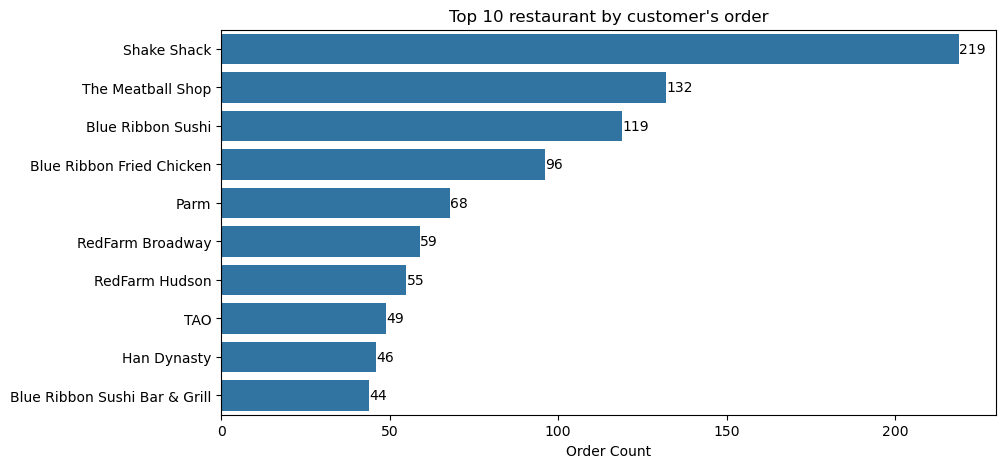

In [21]:
# Count the frequency of each unique Order ID
restaurant_counts = df['restaurant_name'].value_counts().head(10)

# Plotting the bar chart
#plt.figure(figsize=(15, 30))  # Adjust the figure size as per your preference
ax = sns.barplot(x= restaurant_counts.values, y=restaurant_counts.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 10 restaurant by customer's order")
#plt.ylabel('Restaurant names')
plt.xlabel('Order Count')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Oberservation:
From the chart we observe that Shake Shack restaurant recieve more 1.66x more others than the second ranking restaurant. Hence, it might be a good idea to study the restaurant in detail to Identify what they are doing right that can be implimented in other restaurants.

#### Cuisine type

In [22]:
# First, I viewed a list of the unique cusine types
df.cuisine_type.unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [23]:
# I check the frequency of each cuisine type
df.cuisine_type.value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

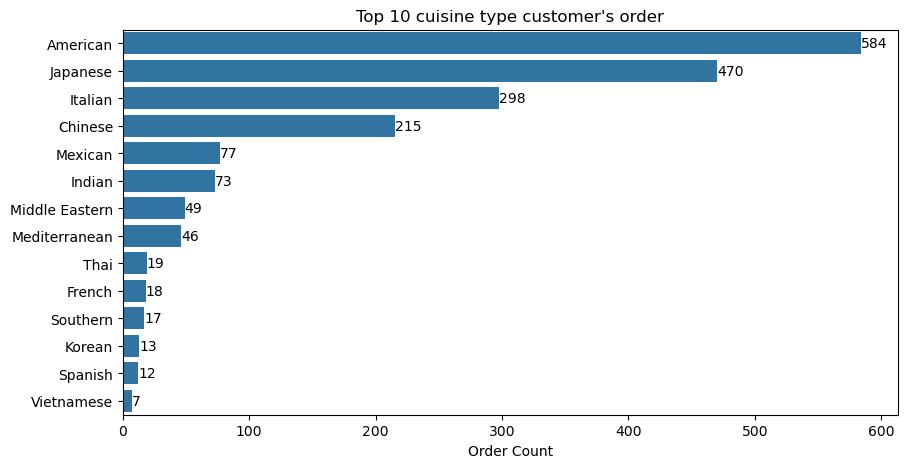

In [39]:
# Count the frequency of each unique Order ID
cuisine_counts = df['cuisine_type'].value_counts()

# Plotting the bar chart
#plt.figure(figsize=(15, 30))  # Adjust the figure size as per your preference
ax = sns.barplot(x= cuisine_counts.values, y=cuisine_counts.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 10 cuisine type customer's order")
#plt.ylabel('Cuisine type')
plt.xlabel('Order Count')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Oberservation:
From the above graph we can see that American cuisine was top followed buy Japanese then Italian then Chinese cuisines With others following

Seeing that American cuisine was the most pupolar, it was interesting to find out if Shake Shack the most popular restaurant were the once that delievered the American cuisine.

In [52]:
# I selected the data where cuisine type is American
df_american = df[df['cuisine_type'] == 'American']
print(f"There are {len(df_american.restaurant_name.unique())} restaurant that prepare American cuisine on our app.\n"
"The following are the top 10:" )
# I counted the number of orders for different restaurants
df_american.restaurant_name.value_counts().head(10)

There are 41 restaurant that prepare American cuisine on our app.
The following are the top 10:


Shake Shack                    219
Blue Ribbon Fried Chicken       96
Five Guys Burgers and Fries     29
Bareburger                      27
The Meatball Shop               20
The Smile                       18
J. G. Melon                     15
Westville Hudson                15
P.J. Clarke's                   15
Burger Joint                    12
Name: restaurant_name, dtype: int64

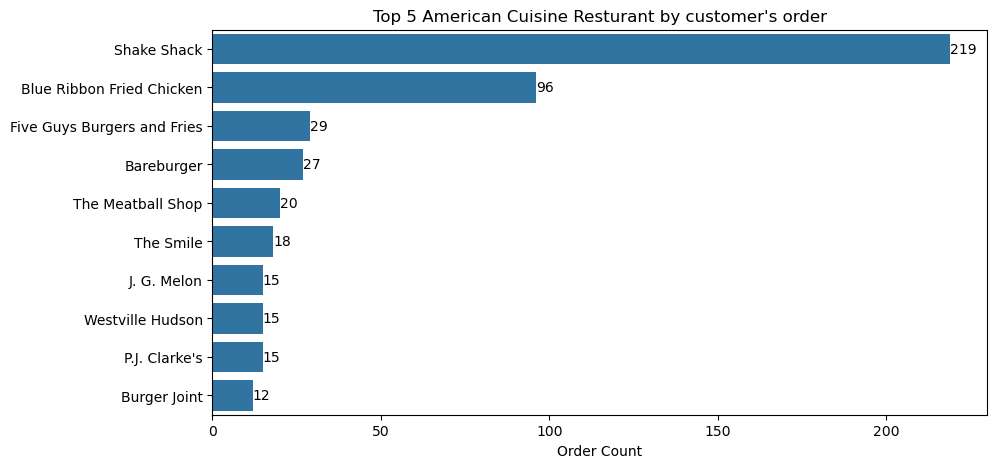

In [51]:
# Count the frequency of each resturant name
american_cuisine_counts = df_american['restaurant_name'].value_counts().head(10)

# Plotting the bar chart
ax = sns.barplot(x= american_cuisine_counts.values, y=american_cuisine_counts.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 5 American Cuisine Resturant by customer's order")
#plt.ylabel('Cuisine type')
plt.xlabel('Order Count')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Oberservation:
It was very interesting to find out that the Shake Shack prepare only American cuisine and are responsible for about 38% (219/584) of the total America cuisine order.

**NB:** Shake Shack and Blue Ribbon Fried Chicken with ranked Ist and 4th respectively by customer patronage owe all their orders to American cuisine. Also 15% of the orders of the second rank restuarant is American cusine. Hence, it shows that American Cusine is very popular in our customer base.

Next, I tried to evaluate the distribution of Japanese cuisine in our chain of restaurant since it was the next ranked cuisine after the American cuisine.

In [50]:
# I selected the data where cuisine type is Japanese
df_japanese = df[df['cuisine_type']=='Japanese']


print(f"There are {len(df_japanese.restaurant_name.unique())} restaurant that prepare Japanese cuisine on our app.\n"
"The following are the top 10:" )

# I counted the number of orders for different restaurants
df_japanese.restaurant_name.value_counts().head(10)

There are 29 restaurant that prepare Japanese cuisine on our app.
The following are the top 10:


Blue Ribbon Sushi                119
TAO                               49
Blue Ribbon Sushi Bar & Grill     44
Nobu Next Door                    42
Sushi of Gari 46                  37
Momoya                            30
Blue Ribbon Sushi Izakaya         29
Sushi of Gari Tribeca             24
Yama Japanese Restaurant          18
Sushi of Gari                     16
Name: restaurant_name, dtype: int64

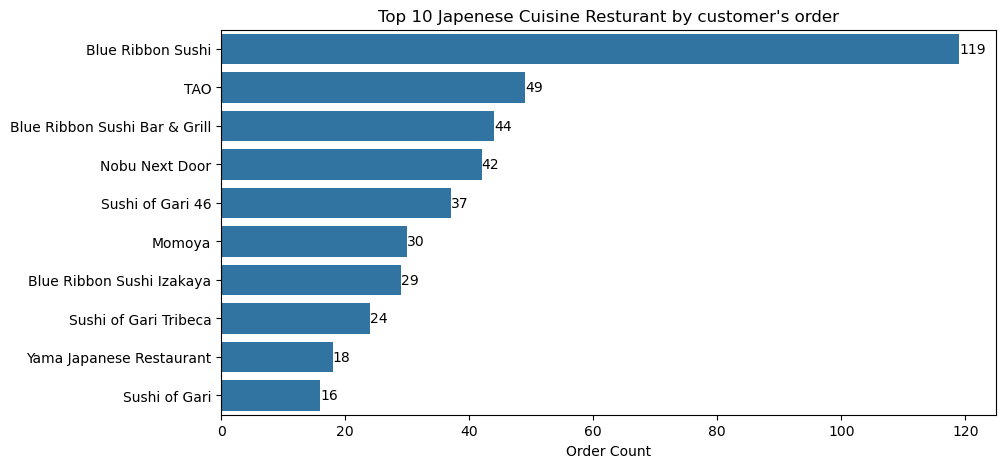

In [53]:
# Count the frequency of each resturant name
japanese_cuisine_counts = df_japanese['restaurant_name'].value_counts().head(10)

# Plotting the bar chart
ax = sns.barplot(x= japanese_cuisine_counts.values, y=japanese_cuisine_counts.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 10 Japenese Cuisine Resturant by customer's order")
#plt.ylabel('Cuisine type')
plt.xlabel('Order Count')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Oberservation:
Blue Ribbon **Sushi, TAO,** and **Blue Ribbon Sushi Bar & Grill** which ranked 3rd, 8th and 10th respectively by customer patronage owe all their orders to Japanese cuisine. Hence, it shows that there might be a relation between specialization and popularity in our customer base.

Next, I noticed that **The Meatball Shop** the second ranked restaurant by customer order was not particularly big on American cuisine and not on the top 10 japenses cuisine. Therefore, I tried to investigate the cusine prepapare at **The Meatball Shop.** 

In [54]:
# I selected the data where cuisine type is Japanese
df_meatball = df[df['restaurant_name']=='The Meatball Shop']


print(f"There are {len(df_meatball.cuisine_type.unique())} cusines prepared in The Meatball Shop. The are as follows: " )

# I counted the number of orders for different restaurants
df_meatball.cuisine_type.value_counts()

There are 2 cusines prepared in The Meatball Shop. The are as follows: 


Italian     112
American     20
Name: cuisine_type, dtype: int64

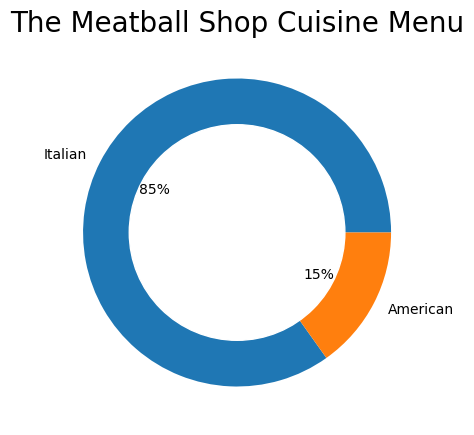

In [60]:
# Getting values for the pie chart
df_meatballs = df_meatball.cuisine_type.value_counts()
labels = df_meatballs.index
data = df_meatballs.values

# Add a title
plt.title("The Meatball Shop Cuisine Menu", fontsize=20)

# plotting the graph
plt.pie(data, labels = labels, autopct='%.0f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

 #### Oberservation:
   Here we observe that The Meatball Shop used a strategic combination of two popular cuisine to stay on top of the order game.

Hence, it looks like while specailization on any of the popluar dishes will favour small shops to gain popularity. However, a strategic combination of two or three top popular cuisine could be what a popular restaurant needs to go from big to mega.

#### Cost of the order

In [62]:
# First I wanted to get the statistical summary of the  cost of order placed on our app
df.cost_of_the_order.describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

In [64]:
# Next I find the total of all others place on our app
total_order_cost = round(df.cost_of_the_order.sum(),2)
f"The total cost of order is ${total_order_cost}"

'The total cost of order is $31314.82'

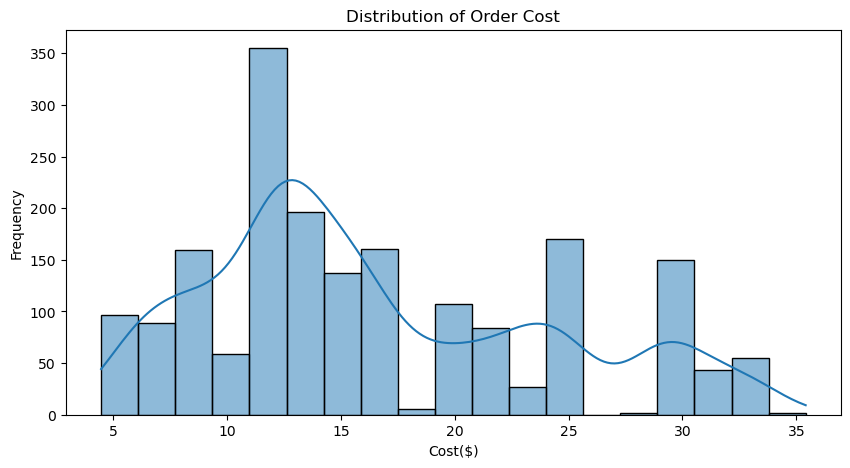

In [87]:
sns.histplot(df.cost_of_the_order,kde=True, color='#1f77b4')
# Adding title and axis labels
plt.title('Distribution of Order Cost')
plt.xlabel('Cost($)')
plt.ylabel('Frequency');

#### Oberservation:
Looking at cost of order distribution we can see that the majority of orders on our app were between 11 to 17 dollars margin.

#### Day of the week

In [76]:
df.day_of_the_week.value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

**Observation:** We have only two days of the week in the data, Weekday (Monday-Friday) and Weekend(Saturday & Sunday)


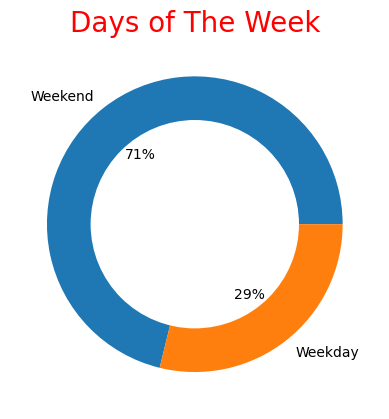

In [42]:
# Getting values for the pie chart
labels = df.day_of_the_week.value_counts().index
data = df.day_of_the_week.value_counts().values

# Add a title
plt.title("Days of The Week", fontsize=20, color="red")

# plotting the graph
plt.pie(data, labels = labels, autopct='%.0f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

#### Oberservation:
The majority of our orders were made during the weekends covering a 71% of the total orders with 29% during week days. 

**NB:** To ensure efficient delievery during the weekends, we can put a special promo for delievery riders that work in the weekend. The order distribution indicates we need more staff allocated to make delievery on the weekend to ensure that orders are delivered on time irrespective of the large order volume.


#### Rating

In [77]:
# Getting an overview of the rating in the data set
df.rating.value_counts()

5    588
4    386
3    188
Name: rating, dtype: int64

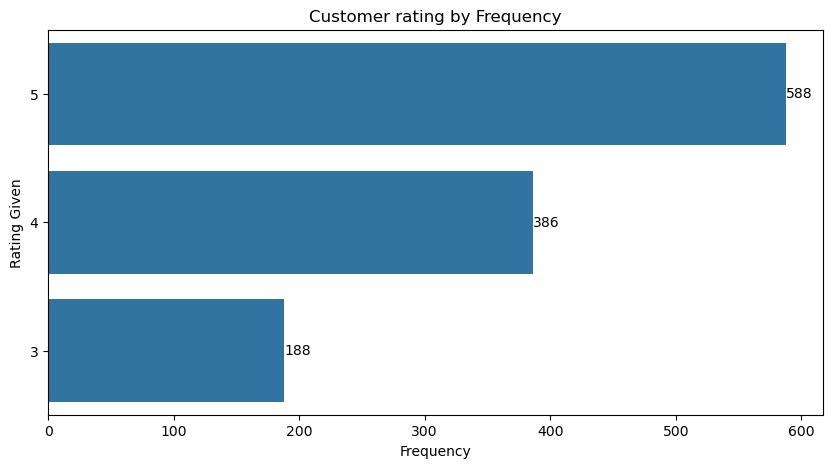

In [109]:
# Count the frequency of each resturant name
rating_counts = df['rating'].value_counts()

# Plotting the bar chart
ax = sns.barplot(x= rating_counts.values, y=rating_counts.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Customer rating by Frequency")
plt.ylabel('Rating Given')
plt.xlabel('Frequency')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Oberservation:
Most of the customers rated the order 5 which indicates that most resturant are doing a good job. 

Considering that we have good rating of 3,4 & 5. I decide to investigate the top 10 resturants with the highest rating count.

In [118]:
# Getting the data where rating is not null
df_rated = df[df['rating'].notnull()]

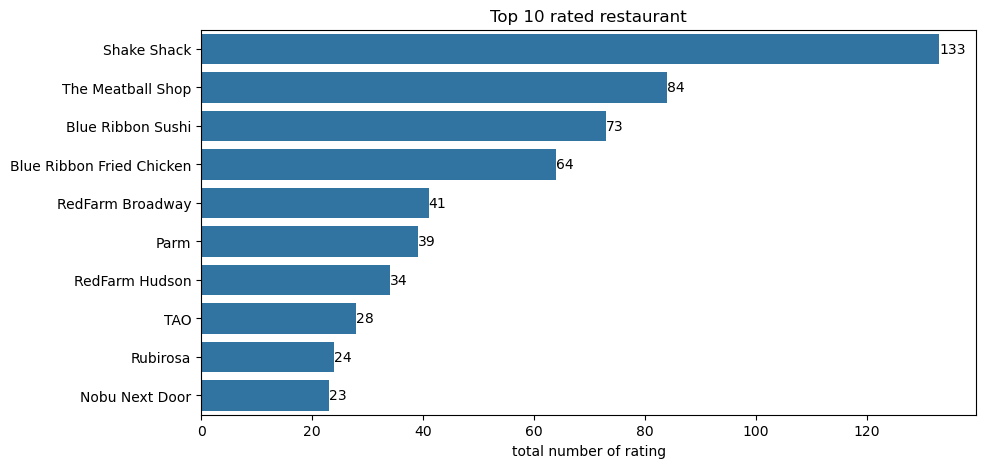

In [117]:
# Count the frequency of each rated resturant name
rated_counts = df_rated.restaurant_name.value_counts().head(10)

# Plotting the bar chart
ax = sns.barplot(x= rated_counts.values, y= rated_counts.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 10 rated restaurant")
#plt.ylabel('Cuisine type')
plt.xlabel('total number of rating')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Oberservation:
Based on this chart, we observed that the top restaurant by order remains the top restaurant with the highest number of rating.
However, base on prior analysis, I know that a little more than 700 orders were not rated. So, I try to see the restaurant where this unrated orders mainly came from.

In [120]:
df_unrated = df[df['rating'].isna()]
len(df_unrated)


736

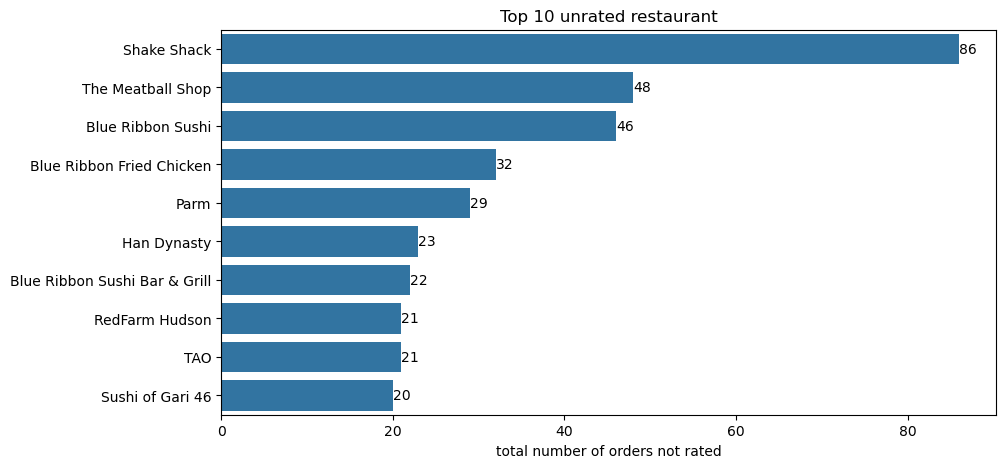

In [119]:
# Count the frequency of each rated resturant name
unrated_counts = df_unrated.restaurant_name.value_counts().head(10)

# Plotting the bar chart
ax = sns.barplot(x= unrated_counts.values, y= unrated_counts.index, color='#1f77b4')

# Adding title and axis labels
plt.title("Top 10 unrated restaurant")
#plt.ylabel('resturant name')
plt.xlabel('total number of orders not rated')

# Assigning label
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Oberservation:
I observed that all restuarant can take advantage of an incentive program that encourages customer to rate them after every order. However, the 10 restaurant that appear on the chart will recieve the highest benefit from such programs. 


Next, I wondered whether there is a positive correlation between high rating count and higher customer potronage.
To evaluate this, I used a scatter plot with rating count of different restaurant on the x-axis and total customer count for the corresponding restuarant on the y-axis

In [375]:
# Geting the x-axis
df_popular = df.restaurant_name.value_counts()
df_rated = df[df['rating'].notnull()]
df_israted = df_rated.restaurant_name.value_counts()
result = pd.concat([df_popular, df_israted], axis=1, ignore_index=True)
result.columns = ['total_customer', 'total_rated_count']
result.head(8)

,total_customer,total_rated_count
Shake Shack,219,133.0
The Meatball Shop,132,84.0
Blue Ribbon Sushi,119,73.0
Blue Ribbon Fried Chicken,96,64.0
Parm,68,39.0
RedFarm Broadway,59,41.0
RedFarm Hudson,55,34.0
TAO,49,28.0


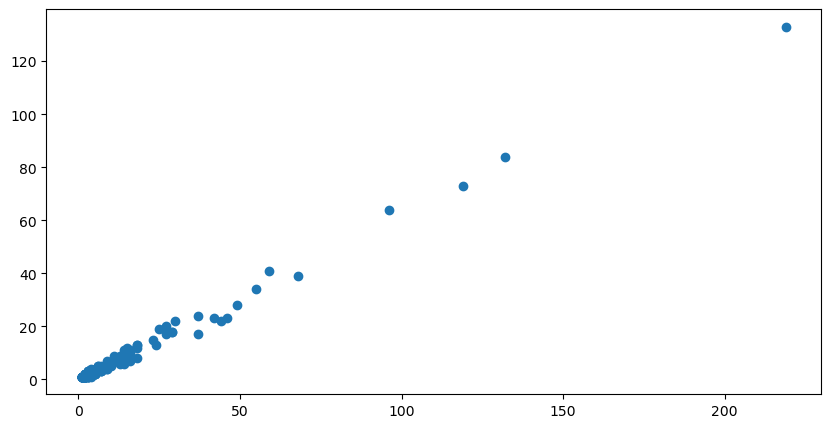

In [144]:
# Get x and y values
x = result.total_customer
y = result.total_rated_count

plt.scatter(x, y)
plt.show()

#### Oberservation:
This show that there is a positive correlation between high number of rating and high customer order. Hence, resturants can encourage their current customer to leave rating after each other to boast patronage of potential customer.

**NB:** A new survery can be collected to study the whether rating infleunces a customer choice to order from a restaurant and better understand the nature of the relationship between rating and customer order.

#### Food Preparation time

<Axes: >

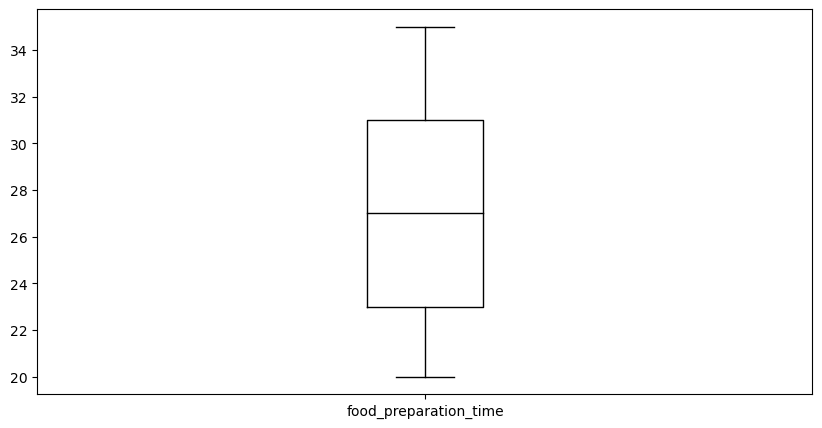

In [84]:
df.boxplot(column =['food_preparation_time'], grid=False, color='black')

#### Oberservation:
From the chart we noticed that in general, it takes about an average of 27 mins to prepare a customers order.

**NB:** It will be intersting to explore if long wait period impact customers rating.

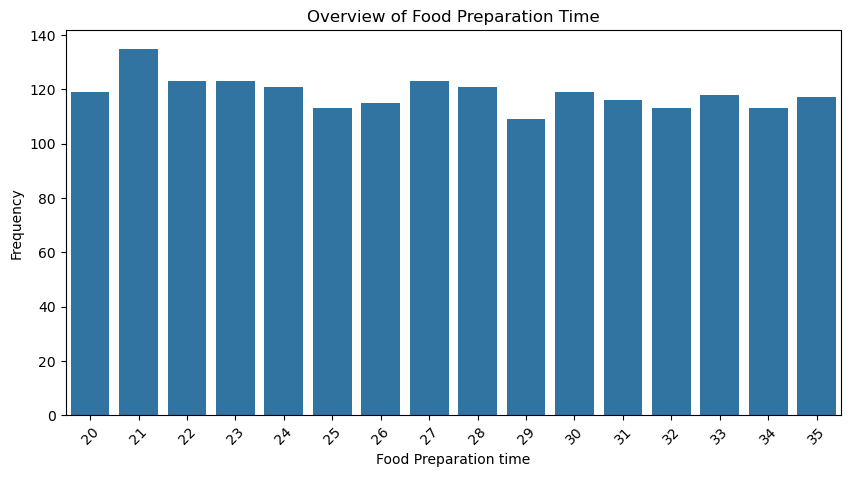

In [388]:
# Getting the rating values
sns.countplot(data=df,x='food_preparation_time',color='#1f77b4');

# Adding title and axis labels
plt.title('Overview of Food Preparation Time');
plt.xlabel('Food Preparation time');
plt.ylabel('Frequency');

# Rotating x-axis labels if necessary
plt.xticks(rotation=45)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Oberservation:
The distribution of the time it takes to prepare food seems like a normal distribution with most food taking between 20 to 35 minutes to prepare.

#### Delivery time

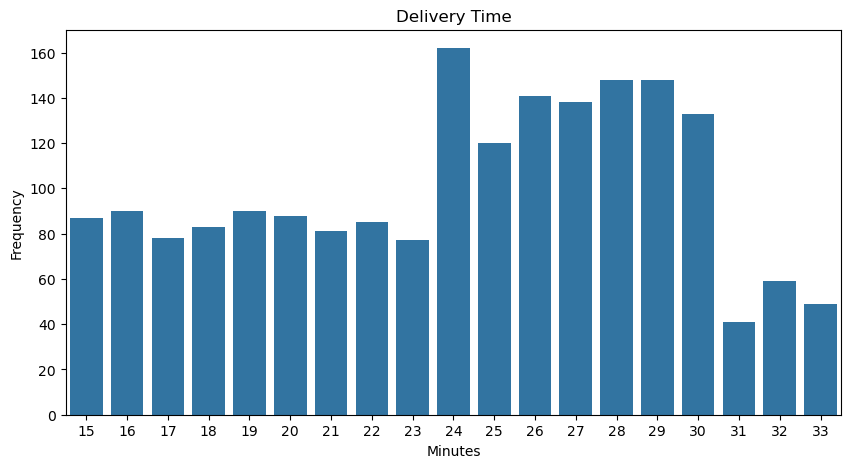

In [389]:
# Plot a histogram distribution of the delievery time
sns.countplot(data=df,x='delivery_time',color='#1f77b4');
#Add titles and labels to chart
plt.title('Delivery Time');
plt.xlabel('Minutes');
plt.ylabel('Frequency');

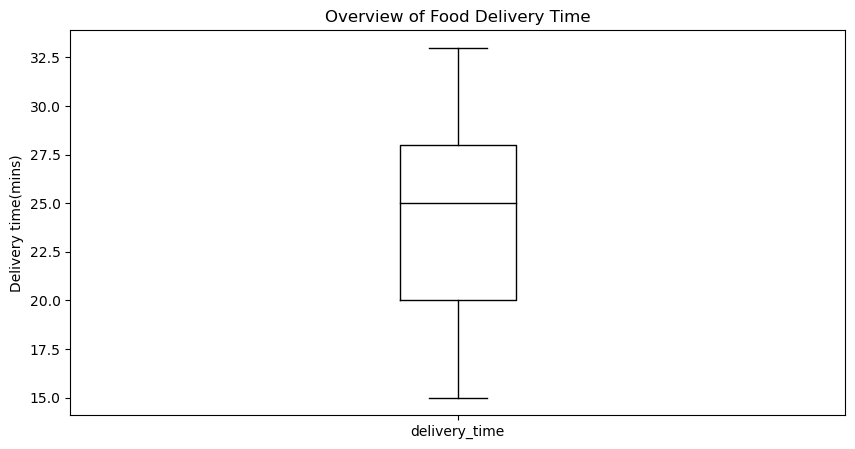

In [386]:
# Getting the rating values
df.boxplot(column =['delivery_time'], grid=False, color='black')

# Adding title and axis labels
plt.title('Overview of Food Delivery Time');
plt.xlabel('');
plt.ylabel('Delivery time(mins)');


# Display the chart
plt.show();

#### Observation:
From the chart, I observed we had a higher freuency of delivery between 24-30 mins. However, from the box plot it is clear that generally the mean delivery time is about 25 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

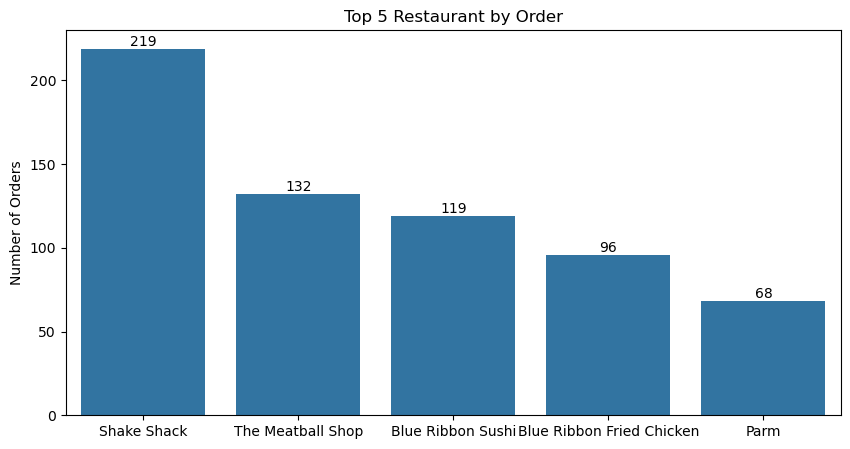

In [151]:

top_res = df.groupby('restaurant_name')[['order_id']].count().sort_values('order_id',ascending=False).head(5)

# Plotting the bar chart
#plt.figure(figsize=(15, 15))  # Adjust the figure size as per your preference
ax = sns.barplot(y= top_res['order_id'].values, x=top_res.index, color='#1f77b4')

# Adding title and axis labels
plt.title('Top 5 Restaurant by Order')
plt.ylabel('Number of Orders')
plt.xlabel('')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Observation:
The top 5 restaurant are as follows:
* Shake Shack 	
* The Meatball Shop	
* Blue Ribbon Sushi	
* Blue Ribbon Fried Chicken	
* Parm	68

Shake Shack restaurant is leading with 87 customers.

### **Question 8**: Which is the most popular cuisine on weekends?

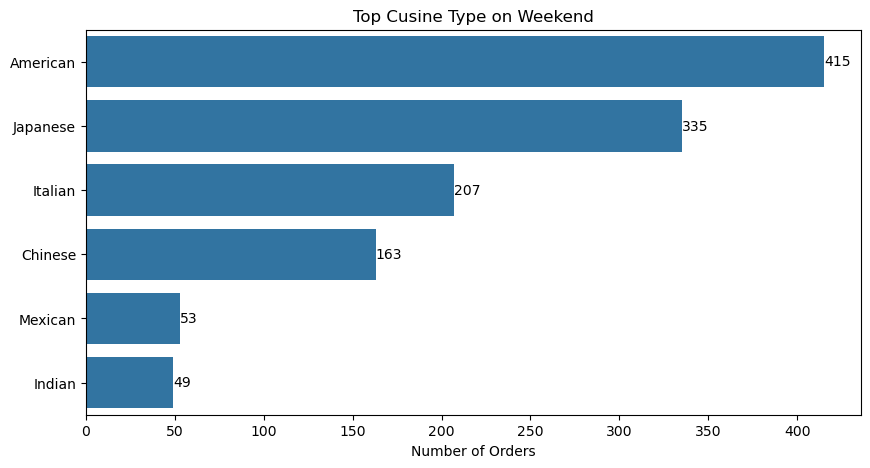

In [152]:
weekend_records = df[df['day_of_the_week'] == 'Weekend']

# Sort the records by the "restaurant" column
# sorted_records = weekend_records.sort_values(by='cuisine_type')
sorted_records = weekend_records.groupby('cuisine_type').size().sort_values(ascending=False).head(6)
sorted_records

# Plotting the bar chart
#plt.figure(figsize=(15, 15))  # Adjust the figure size as per your preference
ax = sns.barplot(x= sorted_records.values, y=sorted_records.index, color='#1f77b4')

# Adding title and axis labels
plt.title('Top Cusine Type on Weekend')
plt.ylabel('')
plt.xlabel('Number of Orders')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();


#### Observation
The most popular cuisine the American cuisine with 80 customer orders more than Japenses Cusine which is secound most popular.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

The total order = 1898
The total order less than $20 = 555
The percentage of orders that cose more than 20 dollars is 29.24%


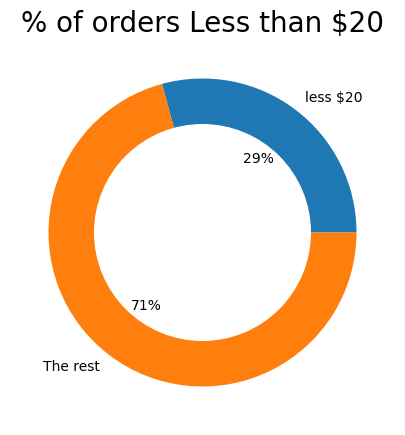

In [157]:
total_order = df.shape[0]
print(f'The total order = {total_order}')

total_order_20 = sum(df.cost_of_the_order > 20)
print(f'The total order less than $20 = {total_order_20}')

percent_order_20 = round(total_order_20/total_order * 100,2)
print(f"The percentage of orders that cose more than 20 dollars is {percent_order_20}%")

# Getting values for the pie chart
labels = ['less $20', 'The rest']
data = [total_order_20, total_order-total_order_20]


# Add a title
plt.title("% of orders Less than $20", fontsize=20)

# plotting the graph
plt.pie(data, labels = labels, autopct='%.0f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
     
plt.show()


#### Observation:
The percentage of orders that cost more than 20 dollars is 29.24%.

### **Question 10**: What is the mean order delivery time?

In [160]:
mean_order = round(df.delivery_time.mean(),2)
f'The mean delivery time is {mean_order} mins'

'The mean delivery time is 24.16 mins'

In [398]:
# Get the average delivery and preparation time for each cuisine type
avg_order_time = df.groupby('cuisine_type')[['delivery_time', 'food_preparation_time']].mean().sort_values('delivery_time',ascending=True)
print(f'The max delivery time is {avg_order_time.delivery_time.round(2).max()} mins')
print(f'The max delivery time is {avg_order_time.delivery_time.round(2).min()} mins')
avg_order_time.head(10)

The max delivery time is 26.14 mins
The max delivery time is 20.92 mins


,delivery_time,food_preparation_time
cuisine_type,,
Korean,20.923077,25.461538
Thai,23.157895,27.315789
Spanish,23.416667,26.916667
Mediterranean,23.586957,27.000000
Southern,23.823529,27.588235
Chinese,23.855814,27.511628
Middle Eastern,24.081633,26.673469
Indian,24.082192,27.109589
Japanese,24.131915,27.510638


##### Observation: 
The mean delivery time is 24.16 mins. However, the mean preparation time varies depending of the cuisine type with Korean restaurant having the lowest mean delivery time of 20.92 mins and the highest delievery time being 26.14 mins.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [163]:
top_cust = df.groupby('customer_id')[['order_id']].count().sort_values('order_id',ascending=False).head(3)
top_cust.columns = ['Frequency']
top_cust

,Frequency
customer_id,
52832,13
47440,10
83287,9


##### Observation: 
The top 3 customers ID is:
* 52832
* 47440
* 83287	

With total number of order at 13, 10, and 9 respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

#### Cuisine vs Total Cost of the order:

In [265]:
# Grouping the cost of the order column of dataframe by cuisine type
cuisine_order_cost = df.groupby('cuisine_type')[["cost_of_the_order"]].sum().sort_values("cost_of_the_order",ascending=False)

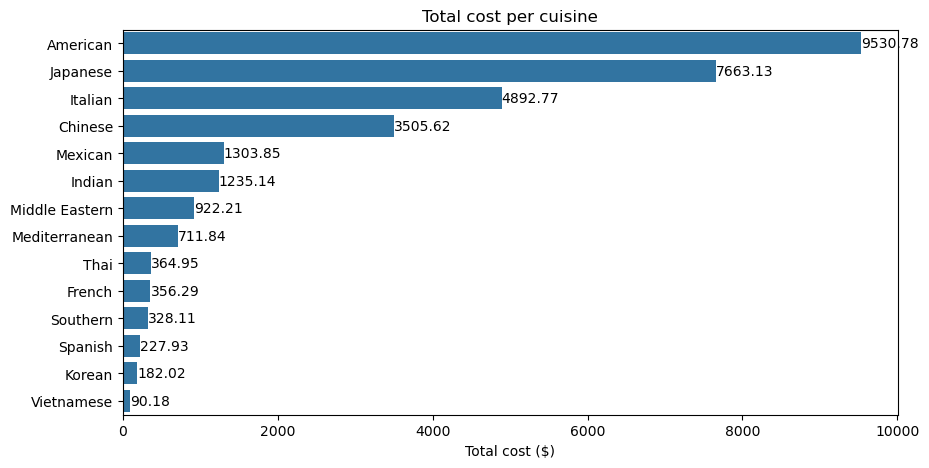

In [264]:
# Creating a group for our plot
groupedvalues = df.groupby('cuisine_type').sum(numeric_only=True).reset_index().sort_values("cost_of_the_order",ascending=False)
 
# use sns barplot to plot bar plot
ax = sns.barplot(y='cuisine_type', x="cost_of_the_order",
                 data=groupedvalues,
                 errwidth=0, color='#1f77b4')

# Adding title and axis labels
plt.title('Total cost per cuisine')
plt.ylabel('')
plt.xlabel('Total cost ($)')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();



#### Observation:
The American cuisine has the highest total cost of order. With a total cost of **9530.78 dollars**, the american cuisine generated **1,867.65 dollars** more than the Japanese cuisine which is the second most popular cuisine in our customer base.

#### Cuisine vs Average Cost of the order

In [393]:
# Grouping based on the avg. cost of each cuisine
avg_cuisine_cost = df.groupby('cuisine_type')[["cost_of_the_order"]].sum().sort_values("cost_of_the_order",ascending=False)

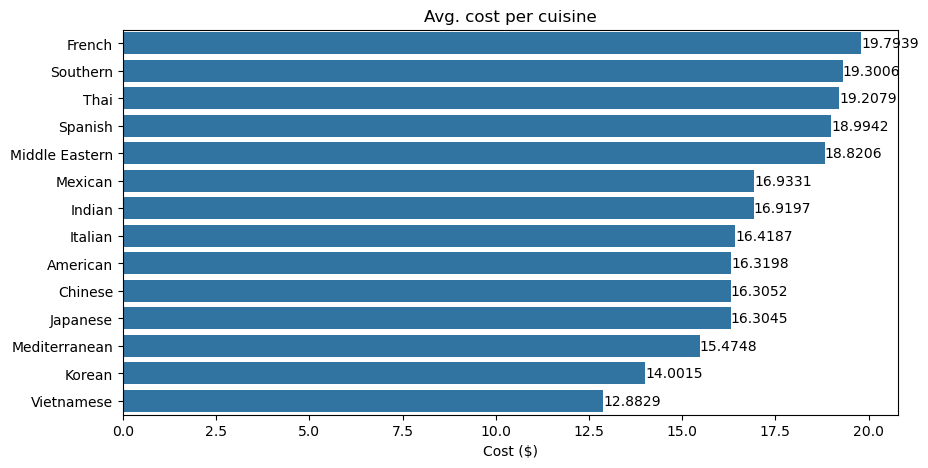

In [266]:
groupedvalues = df.groupby('cuisine_type').mean(numeric_only=True).reset_index().sort_values("cost_of_the_order",ascending=False)
 
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(y='cuisine_type', x="cost_of_the_order",
                 data=groupedvalues,
                 errwidth=0, color='#1f77b4')

# Adding title and axis labels
plt.title('Avg. cost per cuisine')
plt.ylabel('')
plt.xlabel('Cost ($)')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Observation:
The cuisine can be classified into three group based on average cost 
* **Luxuary Cuisines:** (Cuisine that cost above 17 dollars) 

        French, Southern,Thai, Spanish, &  Middle Eastern

* **Normal Cuisines:** (Cuisine that cost between 16-17dollars) 
    
        Mexican, Indian,Italian, American, Chinese & Japanese

* **Cheap Cuisines:** (Cuisine that cost below 16 dollars)
    
        Mediterranean, Korean, & Vietnamese

**Note:** From the popularity chart of the cuisine, the cuisine in the normal category are more popular among our customer base, which may indicate that most customer are comfortable to spend between 16-17 dollars on a meal.

#### Cuisine vs Food Preparation time

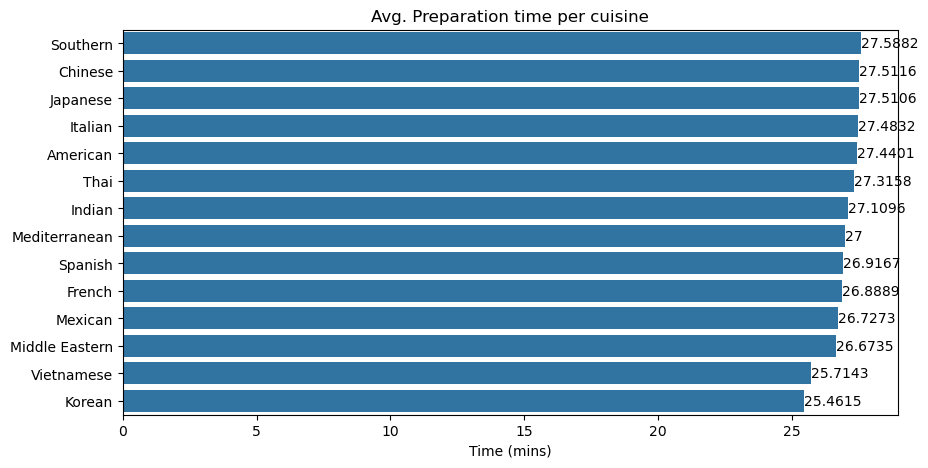

In [268]:
groupedvalues = df.groupby('cuisine_type').mean(numeric_only=True).reset_index().sort_values("food_preparation_time",ascending=False)
 
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(y='cuisine_type', x="food_preparation_time",
                 data=groupedvalues,
                 errwidth=0, color='#1f77b4')

# Adding title and axis labels
plt.title('Avg. Preparation time per cuisine')
plt.ylabel('')
plt.xlabel('Time (mins)')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Observation:
I noticed it takes on average between 26-28 mins to prepare. Hence, it is excepected that the preparation time might not be a major factor that infleunce the popularity of some cuisine types over the other.

#### Day of the Week vs Delivery time

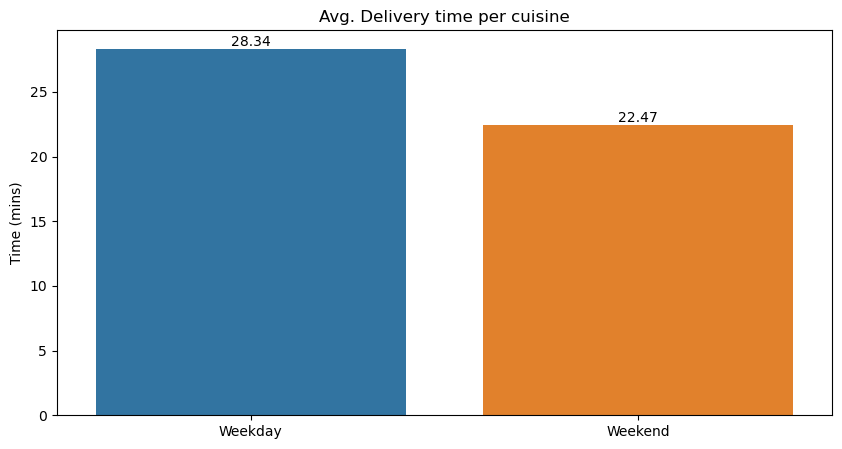

In [278]:
groupedvalues = df.groupby('day_of_the_week').mean(numeric_only=True).reset_index().sort_values("delivery_time",ascending=False)
 
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(x='day_of_the_week', y="delivery_time",
                 data=groupedvalues,
                 errwidth=0) #color='#1f77b4')

# Adding title and axis labels
plt.title('Avg. Delivery time per cuisine')
plt.ylabel('Time (mins)')
plt.xlabel('')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Observation:
The orders on average are delivered faster during the weekend when compared to the weekday. Hence it was intersting to investigate the different in the number of order during the weekdays and the weekend.

#### Order by week day

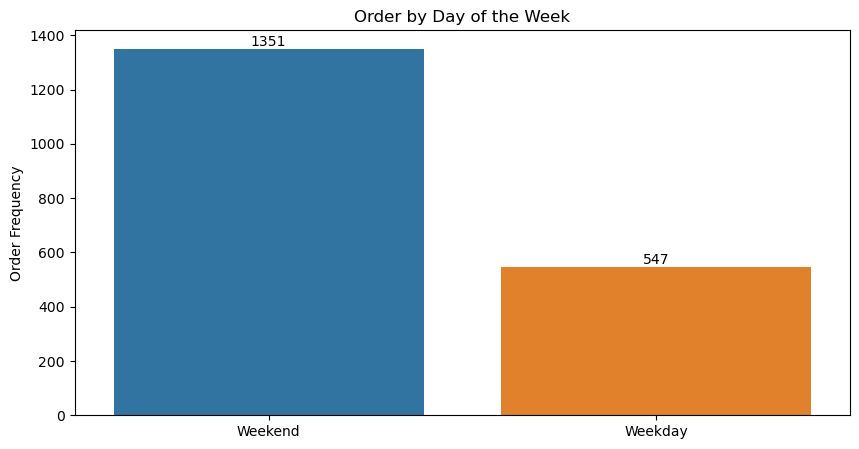

In [279]:
week_order = df.day_of_the_week.value_counts()
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(x=week_order.index, y=week_order.values,
                 errwidth=0) #color='#1f77b4'

# Adding title and axis labels
plt.title('Order by Day of the Week')
plt.ylabel('Order Frequency')
plt.xlabel('')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Observation:
Contrary to what is expected from the delievery time, the orders during the weekend is about 2.5 times more than the order during the weekday. Hence, I hypothesize that there are more delievery personels available to work during the weekend than during the weekday. Further analysis will be required to explore this possibility. If the hypothesis is true, the company might benefit by introducing incentive programe for delievery personels who work actively during the weekdays to impove the average delievery time during the weekday.

#### Day of the Week vs Food Preparation time

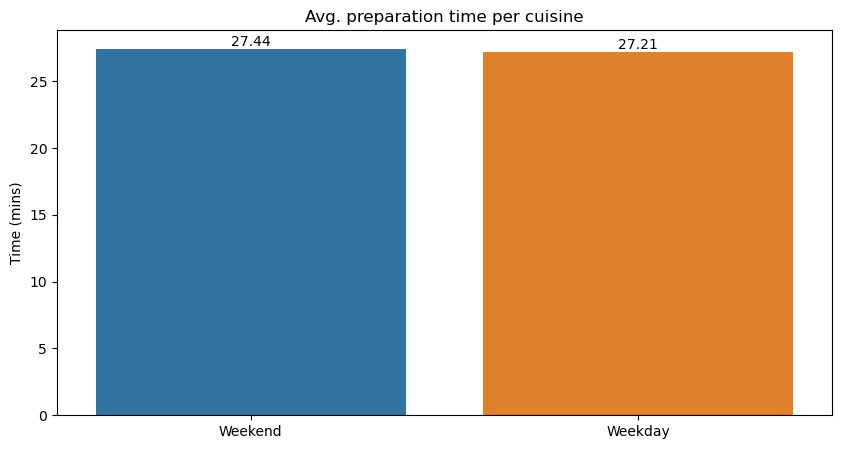

In [367]:
groupedvalues = df.groupby('day_of_the_week').mean(numeric_only=True).reset_index().sort_values("food_preparation_time",ascending=False).round(2)
 
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(x='day_of_the_week', y="food_preparation_time",
                 data=groupedvalues,
                 errwidth=0) #color='#1f77b4')

# Adding title and axis labels
plt.title('Avg. preparation time per cuisine')
plt.ylabel('Time (mins)')
plt.xlabel('')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### observation:
There is no significant difference between the average food preparation time during the weekday and weekend. This suggest that the restuarant have optimized their staffing schedule to buffer the increase order during the weekend. However, new survey and analysis will be required understand the factor in play.

#### Rating vs Delivery time

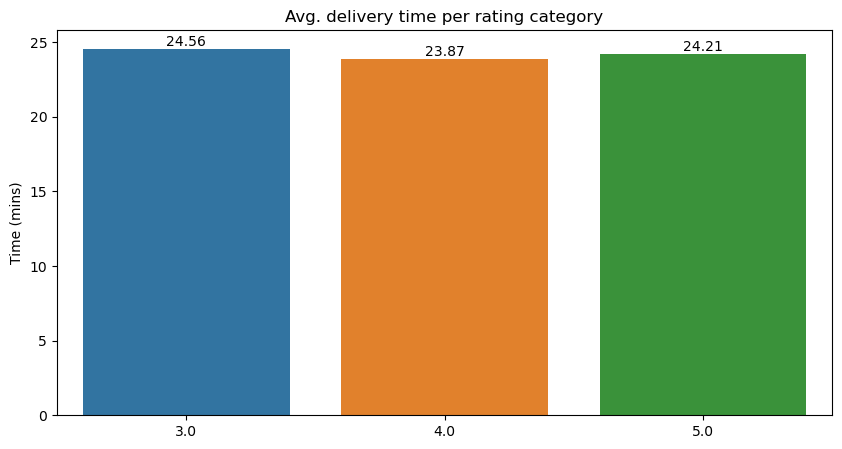

In [366]:
groupedvalues = df.groupby('rating').mean(numeric_only=True).reset_index().sort_values("delivery_time",ascending=False).round(2)
 
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(x='rating', y="delivery_time",
                 data=groupedvalues,
                 errwidth=0) #color='#1f77b4')

# Adding title and axis labels
plt.title('Avg. delivery time per rating category')
plt.ylabel('Time (mins)')
plt.xlabel('')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Observation:
On the average, the customers rating is not significantly impacted by the delivery time. This might be due to the fact that the average delivery time about 24 mins with the faster order delivered in about 21 mins and the slowest order delieverd in 26 mins.


#### Rating vs Cost of the order

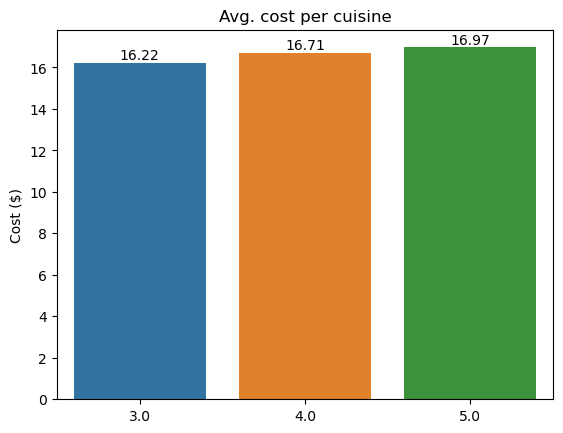

In [18]:
groupedvalues = df.groupby('rating').mean(numeric_only=True).round(2).reset_index().sort_values("cost_of_the_order",ascending=False)
 
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(x='rating', y="cost_of_the_order",
                 data=groupedvalues,
                 errwidth=0) #color='#1f77b4')

# Adding title and axis labels
plt.title('Avg. cost per cuisine')
plt.ylabel('Cost ($)')
plt.xlabel('')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Observation:
This suggest the ratings were randomly assigned hence, the customers rating is not significantly impacted by the cost time. 

#### Correlation among variables

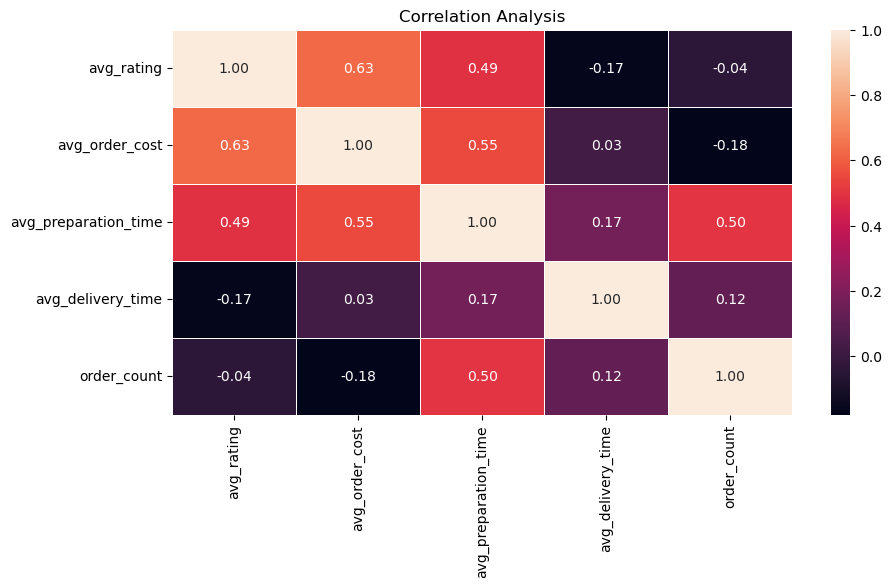

In [297]:
df1 = df
df1 = df1.astype({'rating':'float'})
df2 = pd.DataFrame(df.cuisine_type.value_counts())
df2.columns = [['order_count']]

df_mean = df1.groupby('cuisine_type')[['rating', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']].mean().sort_values('rating', ascending=False)

df3 = pd.concat([df_mean, df2], axis=1, ignore_index=True)
df3.columns =[['avg_rating', 'avg_order_cost', 'avg_preparation_time', 'avg_delivery_time', 'order_count']]

cormat = round(df3.corr(numeric_only=True, method= 'pearson'),2)
# Ploting the heatmap 
sns.heatmap(cormat, annot=True, fmt=".2f", linewidth=.5)
plt.xlabel('')
plt.ylabel('')
plt.title('Correlation Analysis');
plt.show()

For the correlation analysis, the strongest positve correlation is arrange in this hierarchy:

1. avg. cost and avg. rating (0.63)
2. avg. food preparation and avg. cost (0.55)
3. avg. food preparation and order count (0.05)
4. avg. food preparation and avg. rating (0.49)

Although statistically, this correllation are not very strong, this might be a pointer to further survey and analysis to better understand this relationships.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [364]:
# Get the aggregate of the rating (mean, count) for each restaurant
restaurant_prom_offer = df.groupby(df["restaurant_name"]).rating.agg(["count","mean"]).reset_index()


#Get the restuarant that meet the requirment
restaurant_prom_offer[(restaurant_prom_offer["count"]>50) & (restaurant_prom_offer["mean"]>4)]


,restaurant_name,count,mean
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


Bases on the query we discovered only four restaurants meet the requirement.

In [365]:
# We can also achieve the same effect using the query function as below 
restaurant_prom_offer.query("count  > 50 & mean > 4")

,restaurant_name,count,mean
20,Blue Ribbon Fried Chicken,64,4.328125
21,Blue Ribbon Sushi,73,4.219178
136,Shake Shack,133,4.278195
153,The Meatball Shop,84,4.511905


#### Observation:
Only four restaurant qualify for this promo:

                                 rating_count  Avg_rating

*	Blue Ribbon Fried Chicken         64	   4.328125

*	Blue Ribbon Sushi	          73	   4.219178

*	Shake Shack	                  133	   4.278195

*	The Meatball Shop	          84	   4.511905



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [22]:
# Create a new column to store the discounted values
#df["Discounted Price"] = ""

df.loc[df["cost_of_the_order"] > 20, "Revenue"] = df["cost_of_the_order"] * 0.25
df.loc[(df["cost_of_the_order"] > 5) & (df["cost_of_the_order"] <= 20), "Revenue"] = df["cost_of_the_order"] * 0.15

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385


In [23]:
#Total net Revenue 
Total_revenue = round(df.Revenue.sum(),2)
print(f"Total_revenue is {Total_revenue} dollars")

Total_revenue is 6166.3 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [24]:
# Select the columns you want to sum
columns = ["food_preparation_time", "delivery_time"]

# Use the add() method to sum the columns
df["total_time_taken"] = df[columns].sum(axis=1)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time_taken
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,1.7385,49


The total order = 1898
The total order to than $20 = 200
The percentage of orders that cose more than 20 dollars is 10.54%


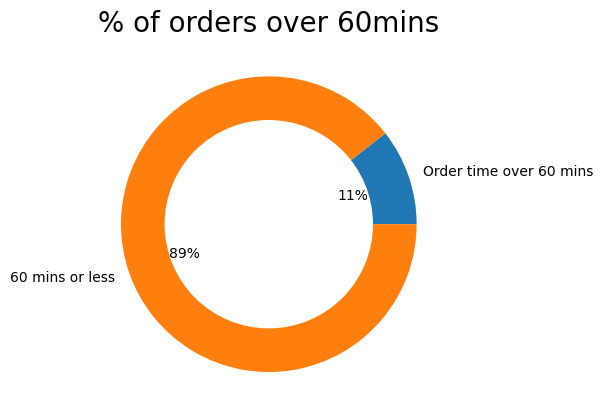

In [26]:
total_order = df.shape[0]
print(f'The total order = {total_order}')

orders_over_60 = sum(df['total_time_taken']> 60)
print(f'The total order to than $20 = {orders_over_60}')

percent_orders_over_60 = round(orders_over_60/total_order * 100,2)
print(f"The percentage of orders that cose more than 20 dollars is {percent_orders_over_60}%")

# Getting values for the pie chart
labels = ['Order time over 60 mins', '60 mins or less']
data = [orders_over_60, total_order-orders_over_60]


# Add a title
plt.title("% of orders over 60mins", fontsize=20)

# plotting the graph
plt.pie(data, labels = labels, autopct='%.0f%%')

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
     
plt.show()

#### Observation:
Here we evaluated the waiting time which is the interval between when the order was placed on the app and when the customer finally recieved the order.

About 11% of the total order had over 60 minutes waiting period. 

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [355]:
# Group the data by weekdays/weekends and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Displaying the mean delivery time for weekdays and weekends
print(mean_delivery_time)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


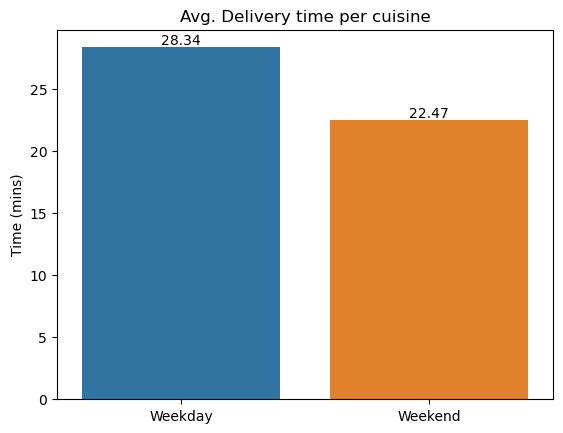

In [27]:
groupedvalues = df.groupby('day_of_the_week').mean(numeric_only=True).reset_index().sort_values("delivery_time",ascending=False)
 
# use sns barplot to plot bar plot
# between days and tip value
ax = sns.barplot(x='day_of_the_week', y="delivery_time",
                 data=groupedvalues,
                 errwidth=0) #color='#1f77b4')

# Adding title and axis labels
plt.title('Avg. Delivery time per cuisine')
plt.ylabel('Time (mins)')
plt.xlabel('')
ax.bar_label(ax.containers[0])

# Rotating x-axis labels if necessary
plt.xticks(rotation=0)  # Adjust the rotation angle if needed

# Display the chart
plt.show();

#### Observation:
The mean deleivery time during the weekdays is higher than at the weekends by 5.87 minutes. So we can conclude that delivery time is faster during the weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

* Double down on increasing the number of orders for American, Japanese, Italian, Chinese, Mexican cuisines, while consider the time and effort it invest in, French, Southern, Thai and Spanish cuisine given their high order cost. Perhaps, these cuisines are expensive to consumers, which contributed to their low number of orders.

* There are 178 restaurants under the foodHub platform, but only 7 has rating count of 50 and average rating greater than 4, these maybe the major traffic drivers to the platform. FoodHub should consider reviewing what these low performing restaurants and find ways to boost their appearance on the platform and offer business advisory services to these low performing restaurants.
* We have 736 orders on the platform without rating. Encourage customers to leave a rating after each order as we noticed a positive correlation between rating count and number of order made by customers.

* With 1898 different orders, only one customer returned to make 13 orders at different point in time. This is poor in my opinion. The company should consider creating loyalty bonus or discounts to its customers to increase the number of times they return to the platform to order for food.

* Company should consider charging for orders that cost less than $5.

* More orders are placed on weekends than weekdays. However, on the average, weekday orders takes a longer delivery time and almost similar average preparation time with orders made on weekend. Company should consider the delivery strategies it employs for orders made on weekday and work on reducing this delivery time for weekday orders.



#### Recommendation for future analysis:
1) Considering we observed a positve correlation between the follow:
* Avg. cost and avg. rating 
* Avg. food preparation and avg. cost 
* Avg. food preparation and order count 
* Avg. food preparation and avg. rating 

It will be interesting conduct an anlysis to explore further and understand how these factors influence customer behaviour.

2) Particularly, it will be interest to explore the relationship between high number of rating and customers tendances to order. This will require sending out new survery with questions that will help us to better study this factor.

3) Looking at the unique charateristics of the top 4 popular restaurant in our database, It might also be important to know if specalization in one or two cuisine with high number of rating infleunces a customers decision to order from a particular restaurant.

These might help us to target some specific resturant to onboard or drop from our app. It can also give us insight to better advise our clients on data-driven approach to increase their orders and boast our revenue.